# Assignment No. 2 - Selma Christensen 
## 180021112
-----
### https://github.com/selmachristensen/PY4SA_Assignment


#### Python Basics

----

**Task 1**  Create an If...Else statement that will test whether a number is divisible by three. "YOUR VALUE is divisible by 3" should be printed if the value is divisible by three. "YOUR VALUE is not divisible by three" should be printed if it is not divisible by three. Test the statement on a numeric variable. Upper case text in the print statement should be replaced with the tested number.


In [758]:
x = 9

if x%3 == (0):
    print (str(x) + " is dividble by 3")

else:
    print (strx(x) + " is not divisible by 3")

9 is dividble by 3


----
**Task 2** Create an If...Else statement that will test whether a type of fruit, represented as a text string, is in a list of acceptable fruits (apple, orange, pear, kiwi, or strawberry). If the fruit is on the list, the following should be printed: "YOUR FRUIT is acceptable." If not, then the following should be printed: "YOUR FRUIT is not acceptable." Upper case text in the print statement should be replaced with the tested fruit.


In [184]:
fruits = ["apple", "orange", "pear", "kiwi", "strawberry"]
x = "strawberry"

#using an if in loop I identified the variables on the list
if x in fruits:
    print(str(x) + " is acceptable.")
else:
    print(str(x) + " is not acceptable.")

strawberry is acceptable.


---
**Task 3** Create a function to calculate the distance between two coordinates using the haversine formula. Write the following formula where the input parameters are a pair of coordinates as two lists.

In [28]:
#I started out by importing the appropriate functions needed to solve the equation
from math import radians, sin, cos, sqrt, atan2 

#then I created a function in which i defined the distance using the harvestine formula as being
#a result of arguments coordinateA and B
def distance_harvestine(coordinateA, coordinateB):
    
#as part of the harvestine formula we needed a value for the (earths) radius
    Earth_radius_in_km = 6371 
    
#I used the map function to convert the latitude and longitude of the coordinates into 
#radians so I could use them in the formula
    latitude1, longitude1 = map(radians, coordinateA) 
    latitude2, longitude2 = map(radians, coordinateB)
    
#then I made an equation for the distance between the two latitude points and the two longitude points
    distance_latitude = latitude2 - latitude1
    distance_longitude = longitude2 - longitude1

#using the previously imported functions, the converted radians, and the distance equation I pluged them 
#into the provided formula
    a = sin(distance_latitude/2)**2 + cos(latitude1) * cos(latitude2) * sin(distance_longitude/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))

#finally I plugged all of the values into the final formula (d=R*c) and returned the distance to 
#indicate that this was the full equation
    distance = Earth_radius_in_km  * c
    return distance

In [29]:
#now that the formula had been defined I choose to coordinates to calculate the distance in between
coordinateA = (55.9533, -3.1883)  # Edinburgh
coordinateB = (56.3398, -2.7967)  # St. Andrews

#writing out the equation i was able to print the results
distance = distance_harvestine(coordinateA, coordinateB)
print(f"The distance between Edinburgh and St Andrews is {distance:.2f} km.")

The distance between Edinburgh and St Andrews is 49.35 km.


---
### Pandas and NymPy

The portland_park_trees.csv file contains information about individual trees in city parks in Portland, Oregon. These data were obtained from the City of Portland Office of Parks & Recreation (https://www.portlandoregon.gov/parks/article/433143).

---

In [30]:
import pandas as pd
data = pd.read_csv('portland_park_trees.csv')
data.head()

,fid,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
0,1,426,2017/05/09,PSME,37.4,Fair,105.0,44.0,57.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
1,2,427,2017/05/09,PSME,32.5,Fair,94.0,49.0,45.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
2,3,428,2017/05/09,CRLA,9.7,Fair,23.0,28.0,27.0,staff,...,Crataegus,Lavalle hawthorn,Crataegus x lavalleei,BD,S,No,NaN,NaN,North America - a hybrid between a Mexican and...,"Like most hawthorns, the tree has stout thorns..."
3,4,429,2017/05/09,QURU,10.3,Poor,28.0,38.0,31.0,staff,...,Quercus,northern red oak,Quercus rubra,BD,L,No,NaN,NaN,North America - eastern Canada and eastern USA...,Acorns take two years to mature and are an imp...
4,5,430,2017/05/09,PSME,33.2,Fair,102.0,43.0,44.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...


----
**Question 1** How many trees are of the Quercus or Acer genus?

In [31]:
data = pd.read_csv('portland_park_trees.csv')

#inorder to get a better overview I selected the specific Genus column
data.Genus
#creating a Boolean mask using the isin function I calculated the length(number of) 
#Quercus and Acer species within the Genus category
amount_of_quercus_or_acer = len(data[data['Genus'].isin(['Quercus', 'Acer'])])

print("There are " + str(amount_of_quercus_or_acer) + " trees of the Quercus or Acer genus")


There are 5675 trees of the Quercus or Acer genus


----
**Question 2** How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

In [32]:
data = pd.read_csv('portland_park_trees.csv')

#first I created a function for the Quercus genus with a DBH of more than 50 inches
Quercus_DBH_large_than_50_inches = data[(data["Genus"] == "Quercus") & (data["DBH"]>50)][["Genus", "DBH"]]

#secondly I created a function for the Acer genus with a DBH of more than 50 inches
Acer_DBH_large_than_50_inches = data[(data["Genus"] == "Acer") & (data["DBH"]>50)][["Genus", "DBH"]]

#thirdly I calculated the length of the preious function 
#(aka the amount of acer genus with a DBH larger than 50 inches)
amount_of_Acer_with_DBH_large_than_50_inches = len(Acer_DBH_large_than_50_inches)

#fourthly I calculated the length of the other preious function 
#(aka the amount of Quercus genus with a DBH larger than 50 inches)
amount_of_Quercus_with_DBH_large_than_50_inches = len(Quercus_DBH_large_than_50_inches)

#finally I printed the result
print("There are " + str(amount_of_Acer_with_DBH_large_than_50_inches +
                         amount_of_Quercus_with_DBH_large_than_50_inches) +
      " trees of the Quercus or Acer genus that have a DBH larger than 50 inches")


There are 124 trees of the Quercus or Acer genus that have a DBH larger than 50 inches


---
**Question 3** Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus?

In [33]:
data = pd.read_csv('portland_park_trees.csv')

#first I identifid the data sample, showing that I only worked with the 3 specific 
#genras within the Genus column

Acer = data[data["Genus"] == "Acer"]

Quercus = data[data["Genus"] == "Quercus"]

Fraxinus = data[data["Genus"] == "Fraxinus"]

#next I calculated the mean DBH within the different genras

DBH_Acer_mean = Acer["DBH"].mean() 

DBH_Quercus_mean = Quercus["DBH"].mean()

DBH_Fraxinus_mean = Fraxinus["DBH"].mean()

#finally I printed them out inorder to compare their values

print(DBH_Acer_mean)
print(DBH_Quercus_mean)
print(DBH_Fraxinus_mean)


18.419085331846066
23.56823839157492
11.033609693877551


In [34]:
#having compared their values it was clear to see that Quercus had the highest mean

print("Quercus has the highest mean DBH")

Quercus has the highest mean DBH


---
**Question 4** How many different species of trees are recorded in the Acer genus?

In [35]:
data = pd.read_csv('portland_park_trees.csv')
#the following line identifies the rows in which the Genus coloumn is equal to acer 
#creating a coresponding name
rec_acer= data.loc[data["Genus"] == "Acer"]
#using the unique funtction I found the amount of different values within the species
#categories which genus column was equal to acer (hence the use of the previous function lable)
amount_different_acer_species = len(rec_acer["Species"].unique())

print ("There are " + str(amount_different_acer_species) +
       " different species of trees recorded in Acer genus")

There are 20 different species of trees recorded in Acer genus


---
**Using new data set**: The world_cities.csv is a file that contains cities, countries, population, coordinates (geographic) and a Boolean attribute that defines if the city is the capital city or not. Read this file as a Pandas dataframe and create the required scripts


In [36]:
#first I made sure to import the appropriate libraries

import numpy as np
import pandas as pd

#then I read the data file, taking a look at the first 5 collums to make sure that it was correct

data = pd.read_csv('world_cities.csv', header=0)
data.head()

,city,country,pop,lat,lon,capital
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0
3,'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0
4,'Abud,Palestine,2456,32.03,35.07,0


---

**Question 5**

**Calculate a new column named "pop_M" (population in millions), by transforming the "pop" (population) column**

In [37]:
data = pd.read_csv('world_cities.csv', header=0)

#I started out by creating a new column in which the old pop column was being divided by a million to 
#represent population in millions

data['pop_M'] = data['pop']/1000000 

#Then I printed out the first 10 rows of the table to make sure it was correct
print(data.head(10)) 

                 city       country    pop    lat    lon  capital     pop_M
0  'Abasan al-Jadidah     Palestine   5629  31.31  34.34        0  0.005629
1  'Abasan al-Kabirah     Palestine  18999  31.32  34.35        0  0.018999
2        'Abdul Hakim      Pakistan  47788  30.55  72.11        0  0.047788
3  'Abdullah-as-Salam        Kuwait  21817  29.36  47.98        0  0.021817
4               'Abud     Palestine   2456  32.03  35.07        0  0.002456
5             'Abwein     Palestine   3434  32.03  35.20        0  0.003434
6            'Adadlay       Somalia   9198   9.77  44.65        0  0.009198
7              'Adale       Somalia   5492   2.75  46.30        0  0.005492
8               'Afak          Iraq  22706  32.07  45.26        0  0.022706
9               'Afif  Saudi Arabia  41731  23.92  42.93        0  0.041731



**Remove the original "pop" column**

In [38]:
data = pd.read_csv('world_cities.csv', header=0)
data['pop_M'] = data['pop']/1000000

#next I deleted/dropped the "pop" column, by using the .drop function, identifying the column,
#and stating that inplace=true to make it a permanent change
data.drop(columns=['pop'], inplace=True)

#again I printed out the first 10 rows to ensure it was correctly executed
print(data.head(10))

                 city       country    lat    lon  capital     pop_M
0  'Abasan al-Jadidah     Palestine  31.31  34.34        0  0.005629
1  'Abasan al-Kabirah     Palestine  31.32  34.35        0  0.018999
2        'Abdul Hakim      Pakistan  30.55  72.11        0  0.047788
3  'Abdullah-as-Salam        Kuwait  29.36  47.98        0  0.021817
4               'Abud     Palestine  32.03  35.07        0  0.002456
5             'Abwein     Palestine  32.03  35.20        0  0.003434
6            'Adadlay       Somalia   9.77  44.65        0  0.009198
7              'Adale       Somalia   2.75  46.30        0  0.005492
8               'Afak          Iraq  32.07  45.26        0  0.022706
9               'Afif  Saudi Arabia  23.92  42.93        0  0.041731


**Choose/subset a city that starts with the same letter as your first name (for example, "Mexico City" if your first name is Michael)**

In [39]:
# As my name starts with an S, I chose the city Sololo in Gambia 
# Below is the query I ran, to show the different characteristics of Sololo "city",
#"country", "lat", "lon", "capital", "pop_M"
sololo_query= data.query('city=="Sololo"')[["city", "country", "lat", "lon", "capital", "pop_M"]]
print(sololo_query)

         city country    lat    lon  capital     pop_M
35731  Sololo  Gambia  13.45 -14.68        0  0.000799


**Subset the five biggest (i.e., largest population sizes) cities from the country where your selected city is**

In [40]:
# I made a subset query in which I first identified the data I wanted to work with (Gambia)
# Then I sorted the values within the query according to their population size (pop_m) 
# from highest to lowest (ascending=False)
# Finally I added the three categories I wanted to be shown, country, pop_M, and city
subset_query = data.query('country=="Gambia"').sort_values(["pop_M"], ascending=False)
[["city", "country", "pop_M"]]
print(subset_query.head(5))


              city country    lat    lon  capital     pop_M
34573  Serre Kunda  Gambia  13.45 -16.68        0  0.335733
5382       Brikama  Gambia  13.28 -16.66        0  0.080726
2925         Bakau  Gambia  13.49 -16.69        0  0.045529
3264        Banjul  Gambia  13.46 -16.60        1  0.034388
11205    Farafenni  Gambia  13.57 -15.61        0  0.030418


---
### Python Data Visualization
Using the same dataset portland_park_trees.csv, create using seaborn, pandas or matplotlib libraries the following charts:

---

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
%matplotlib inline

---
**Graph 1** Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis (Hint: You will need to use the “Genus”, “DBH”, and “TreeHeight” attributes.).

Text(0, 0.5, 'Tree Height')

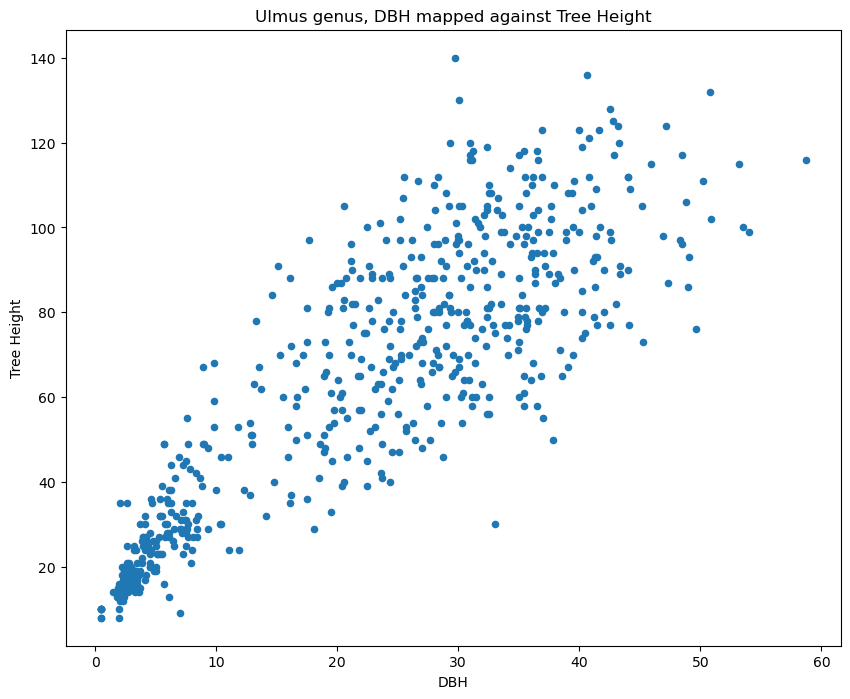

In [42]:
data= pd.read_csv('portland_park_trees.csv')
Ulmus_sample = data[(data["Genus"]=="Ulmus")]
Ulmus_sample.plot.scatter(x = "DBH", y = "TreeHeight")
plt.title ("Ulmus genus, DBH mapped against Tree Height") #title of the graph
plt.xlabel("DBH") # x axis label
plt.ylabel("Tree Height") #y axis label

---
**Graph 2** Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue (Hint: You will need to use the “Genus”, “Genus_spec”, “DBH”, and “TreeHeight” attributes.)

Text(0, 0.5, 'Tree Height')

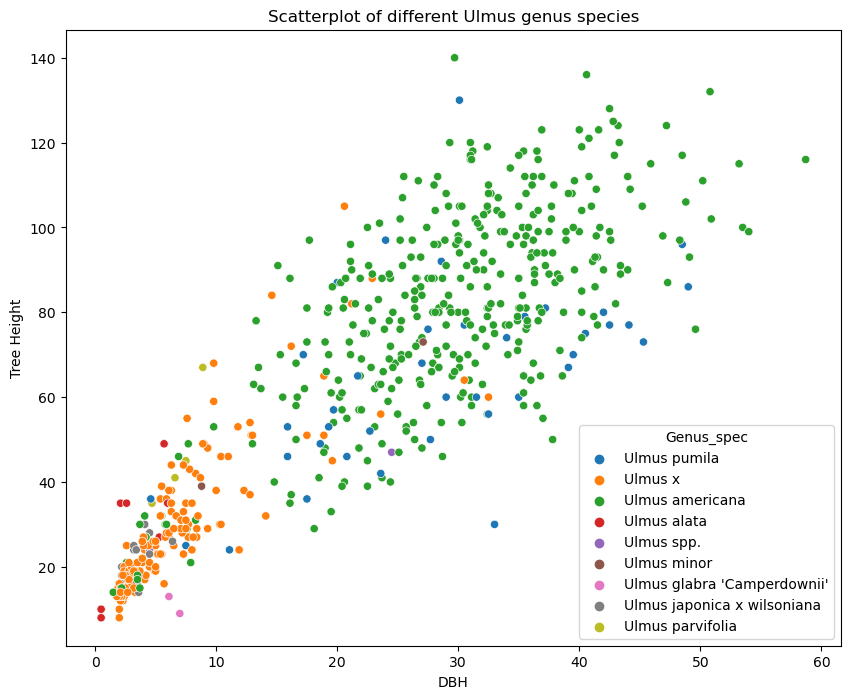

In [43]:
Ulmus_sample = data[(data["Genus"]=="Ulmus")]#defining what data to use
sns.scatterplot(data=Ulmus_sample, x="DBH", y="TreeHeight", hue="Genus_spec")
#the scatterplot mapped as a Seaborn
plt.title ("Scatterplot of different Ulmus genus species") #title of the graph
plt.xlabel("DBH") # x axis label
plt.ylabel("Tree Height") #y axis label

---
**Graph 3** Create a boxplot of DBH for just the Ulmus genus differentiated by species (or, each species should have its own boxplot).

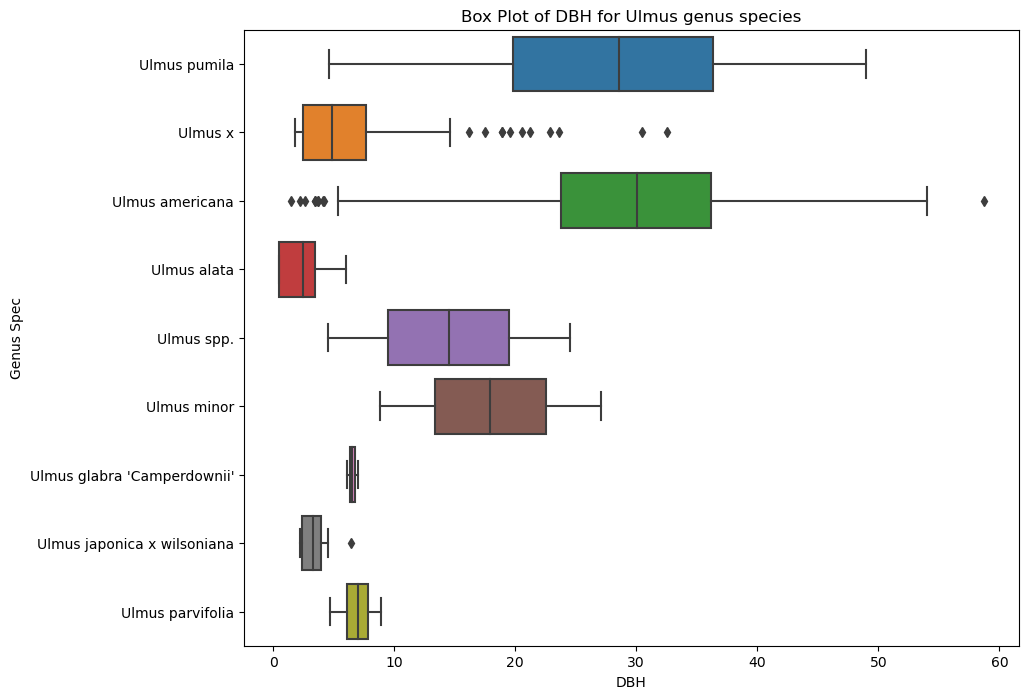

In [44]:
data= pd.read_csv('portland_park_trees.csv')
Ulmus_sample = data[(data["Genus"]=="Ulmus")] #defining the specific data
sns.boxplot(data=Ulmus_sample, x="DBH", y="Genus_spec")#boxplot mapped as a Seaborn
plt.xlabel("DBH") # x axis label
plt.ylabel("Genus Spec") #y axis label
plt.title("Box Plot of DBH for Ulmus genus species")#title of the graph
plt.show()

---
**Graph 4** Combine Graphs 1 and 3 into a single figure. Do not plot a legend for any of the graphs.


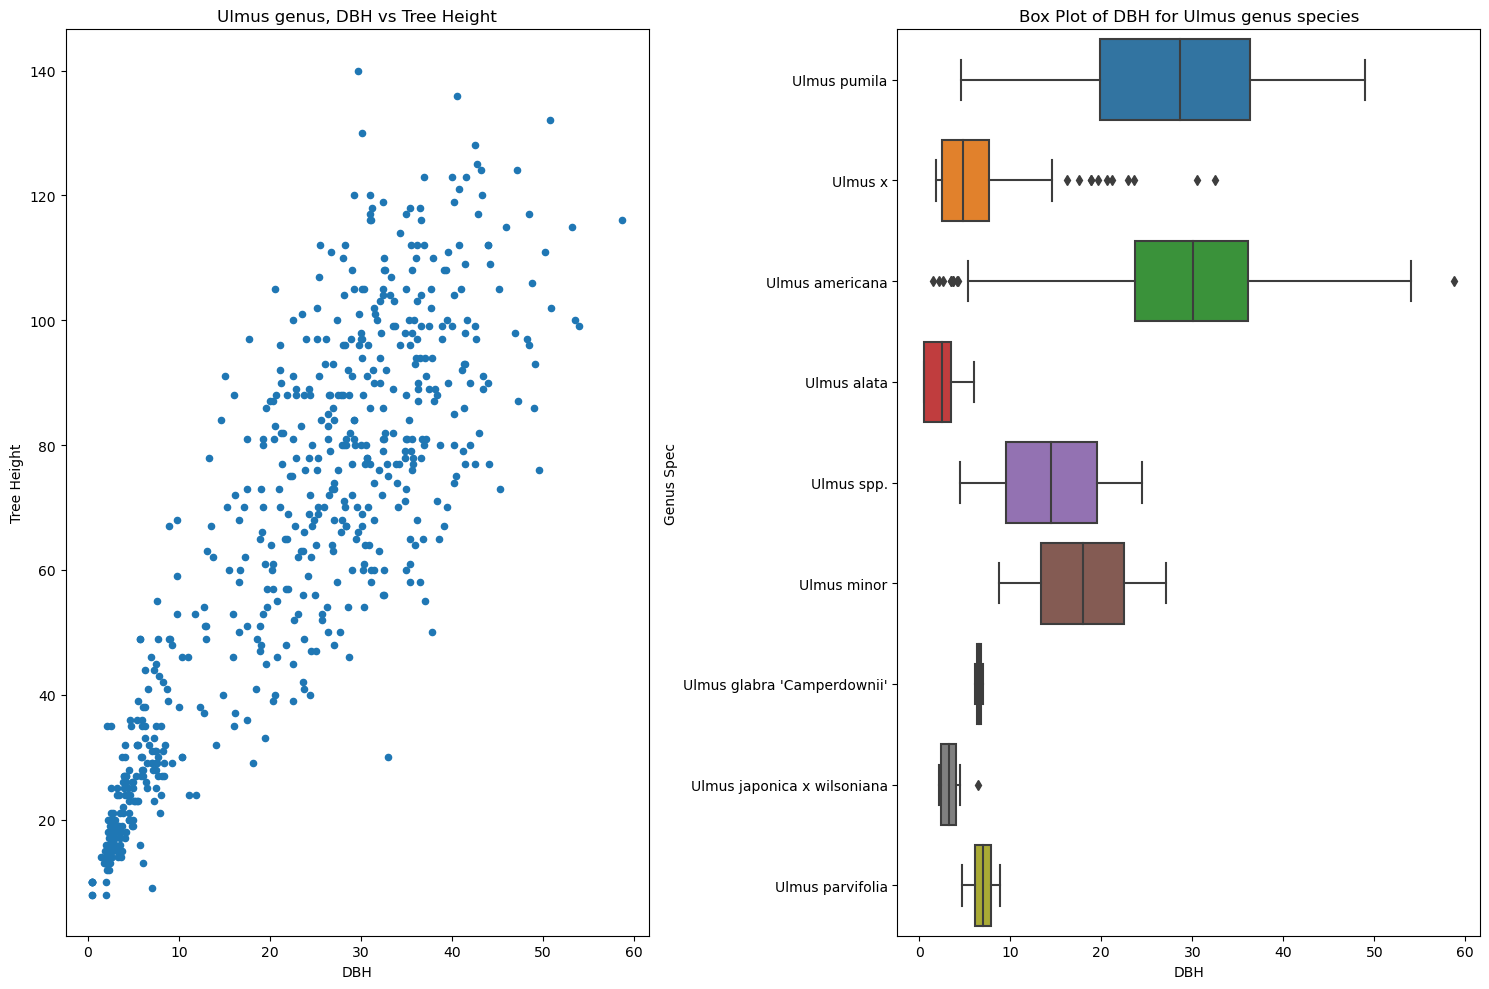

In [45]:
data = pd.read_csv('portland_park_trees.csv')
Ulmus_sample = data[(data["Genus"]=="Ulmus")]

fig1,(ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 10))
#creating a subplot inorder to include both graphs

Ulmus_sample.plot.scatter(x = "DBH", y = "TreeHeight", ax=ax1) #showing that scatterplot is on axis 1
ax1.set_title("Ulmus genus, DBH vs Tree Height") #titel label
ax1.set_xlabel("DBH") #x-axis label
ax1.set_ylabel("Tree Height") #y-axis label

sns.boxplot(data=Ulmus_sample, x= "DBH", y = "Genus_spec", ax=ax2) #showing that boxplot is on axis 2
ax2.set_title("Box Plot of DBH for Ulmus genus species") #titel label
ax2.set_xlabel("DBH") #x-axis label
ax2.set_ylabel("Genus Spec") #y-axis label

plt.tight_layout() #making sure the graphs do not overlap
plt.show()


---
### Python GeoPandas

Go to the Spatial Data Portal of Scotland and find any spatial data that you find interesting in a shapefile format. Download this data and Produce code to complete the requested tasks.

---
**Task 1** Read the selected dataset as GeoPandas DataFrame

<AxesSubplot: >

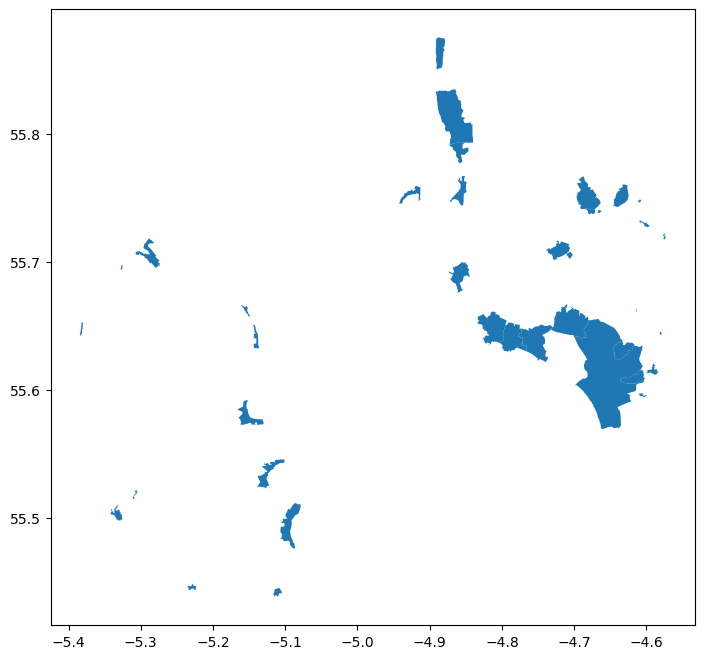

In [46]:
import geopandas as gpd
import numpy as np
import pandas as pd

APA = gpd.read_file('Alcohol_Prohibition_Areas.shp') #reading file through GeoPanda gpd

APA.plot()

---
**Task 2** Use the correct code to plot the first 5 and the last 5 sets of records in your selected dataset.

In [47]:
APA.head(5)

,OBJECTID,NAME,geometry
0,1,Skelmorlie,"POLYGON ((-4.88868 55.87468, -4.88868 55.87468..."
1,2,Largs A,"POLYGON ((-4.87840 55.83358, -4.87839 55.83358..."
2,3,Largs B,"POLYGON ((-4.84823 55.78890, -4.84817 55.78890..."
3,4,Millport,"POLYGON ((-4.93146 55.75405, -4.93092 55.75427..."
4,5,West Kilbride,"POLYGON ((-4.85966 55.69754, -4.85935 55.69769..."


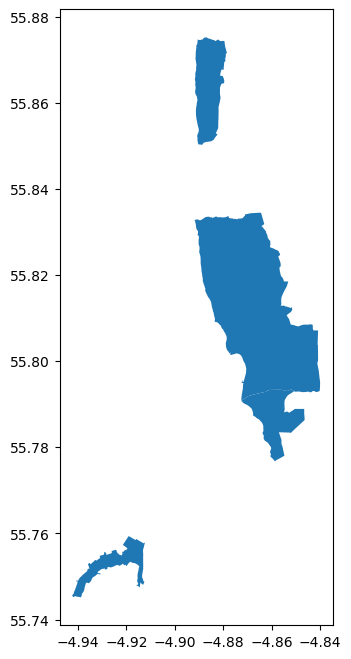

In [48]:
APA = gpd.read_file('Alcohol_Prohibition_Areas.shp')
ploted_APAhead = APA[0:4] #defining what part to plot 
ploted_APAhead.plot()
plt.show() #the first five sets of the record

In [49]:
APA.tail(5)

,OBJECTID,NAME,geometry
32,33,Torranyard,"POLYGON ((-4.61340 55.66227, -4.61339 55.66226..."
33,34,Stevenston,"POLYGON ((-4.73590 55.65008, -4.73579 55.65010..."
34,35,Saltcoats,"MULTIPOLYGON (((-4.77448 55.64761, -4.77447 55..."
35,36,Ardrossan,"POLYGON ((-4.79495 55.65117, -4.79496 55.65114..."
36,37,Fairlie,"MULTIPOLYGON (((-4.85460 55.74369, -4.85515 55..."


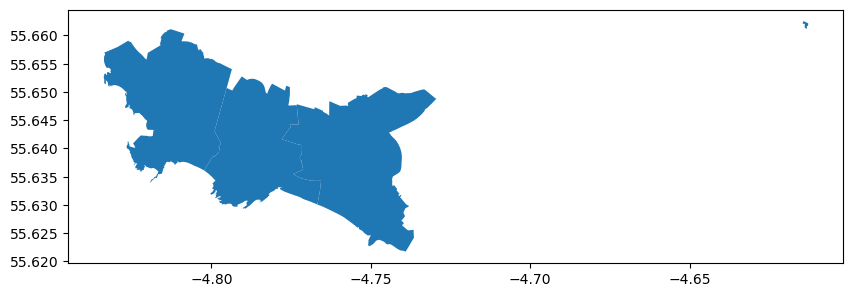

In [50]:
APA = gpd.read_file('Alcohol_Prohibition_Areas.shp')
ploted_APAtail = APA[32:36] #defining what part to plot 
ploted_APAtail.plot()
plt.show() #the last five sets of the record

---
**Task 3**  Create a map where you can explore the selected dataset. Try to plot the map using some categorical attribute. Include a ToolTip.

In [51]:
#I chose the categorical attribute "NAME"
APA.explore(column="NAME", cmap='RdYlBu')












---
**Task 4** What is the Coordinate Reference System of the selected dataset?

In [52]:
APA.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

---
**Task 5** How many features does the selected dataset contain?

In [53]:
print("The data set I selected has " + str(APA.shape[0]) + " features.") 
#using .shape to define the amount of features

The data set I selected has 37 features.


---
**Task 6** Define a sub-setting criterion to create a new geopandas dataframe where you filter the selected dataset based on a categorical attribute.

In [54]:
APAcat = APA[["NAME"]] #showing which categorical attribute to include
APAcat.head(10)

,NAME
0,Skelmorlie
1,Largs A
2,Largs B
3,Millport
4,West Kilbride
5,Dalry
6,Burnhouse
7,Barmill
8,Gateside
9,Longbar


---
**Task 7** Define a sub-setting criterion to create a new geopandas dataframe where you filter the selected dataset based on a numerical attribute.

In [55]:
APAnum = APA["NAME"] == "Blackwaterfoot" #showing which numerical attribute to include
APAnum.tail(10)

27     True
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
Name: NAME, dtype: bool

---
**Task 8** Plot the new/filtered geopandas dataframe using one of the attributes to create a choropleth map. 

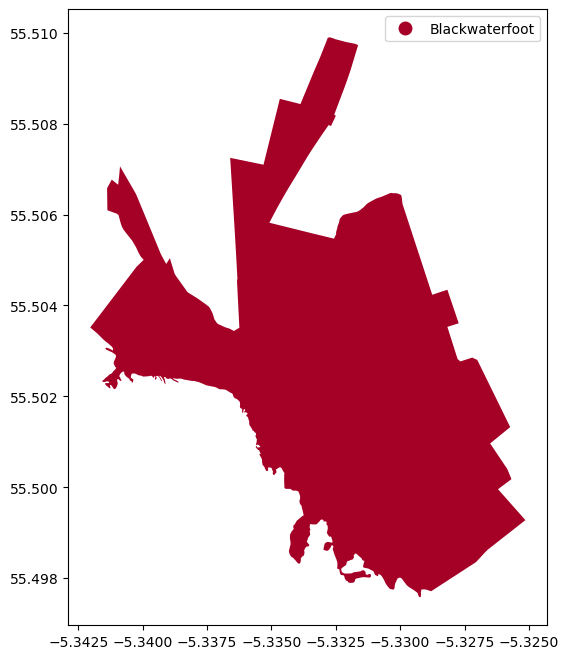

In [56]:
APAnum = APA[APA["NAME"] == "Blackwaterfoot"] 
#shows only those with the attribute Blackwaterfoot within the NAME category

APAnum.plot(column="NAME", cmap='RdYlBu', legend=True) #plots the map, including the legend
plt.show()

---
### Python Rasterrio

The dataset for this part of the assignment is elev.tif a 30 m spatial resolution digital elevation model (DEM) derived from the National Elevation Dataset (NED) in Canada with elevation in meters.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot
from rasterio.plot import show
from rasterio.plot import show_hist

---
**Task 1** Read the file as a rasterio dataset

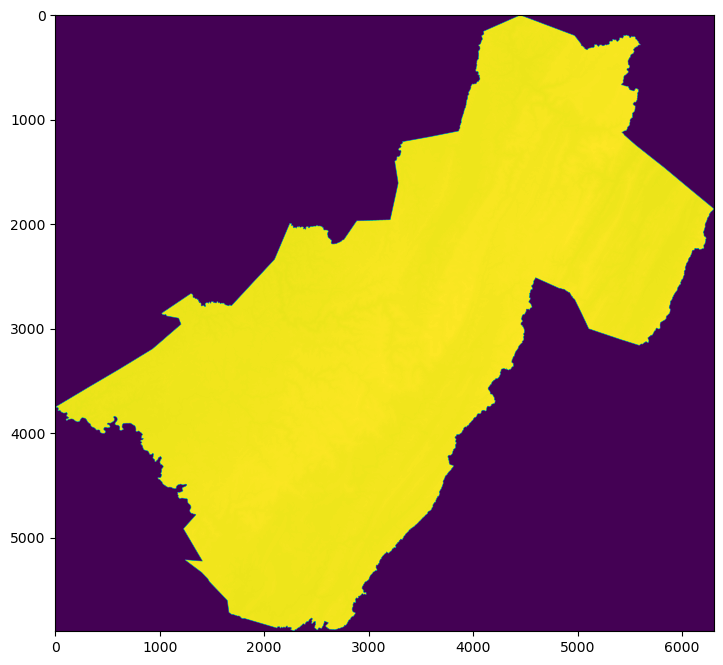

<AxesSubplot: >

In [61]:
with rio.open('elev.tif') as elev: #imports dataset as elev
    elev = elev.read(1) #reads dataset
show(elev) #shows dataset


---
**Task 2** What is the CRS of the dataset?

In [62]:
with rio.open('elev.tif') as elev: #opens dataset
    crs = elev.crs #defines the CRS
print(crs) #prints CRS

EPSG:32617


---
**Task 3** Describe the raster dataset regarding the raster extent (bounds), the reference system, and how many bands are in this dataset.

In [63]:
raster_extent = elev.bounds #deines the bounds within dataset
reference_system = elev.crs #defines the CRS (reference system) within dataset
amount_of_bands = elev.count #defines the amount of bands within dataset

print("Results:")
print(raster_extent)
print(reference_system)
print(amount_of_bands)
print(" ")
print("Description:")
print("The raster dataset we are working with is using the " + str(reference_system) + 
      " , the Projected coordinate system for the area between 84°W and 78°W, " 
      " northern hemisphere between equator and 84°N, " + 
      " onshore and offshore. It has " + str(amount_of_bands) +
      " band, meaning that it only has one data layer showing the elevation in meters in Canada. " 
      " The raster extent (bounds) of the dataset, is " + str(raster_extent) + 
      " showing the area which the dataset encompases.")


Results:
BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)
EPSG:32617
1
 
Description:
The raster dataset we are working with is using the EPSG:32617 , the Projected coordinate system for the area between 84°W and 78°W,  northern hemisphere between equator and 84°N,  onshore and offshore. It has 1 band, meaning that it only has one data layer showing the elevation in meters in Canada.  The raster extent (bounds) of the dataset, is BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138) showing the area which the dataset encompases.


---
**Task 4** Create a plot/map of the raster dataset.

Text(0, 0.5, 'Latitude')

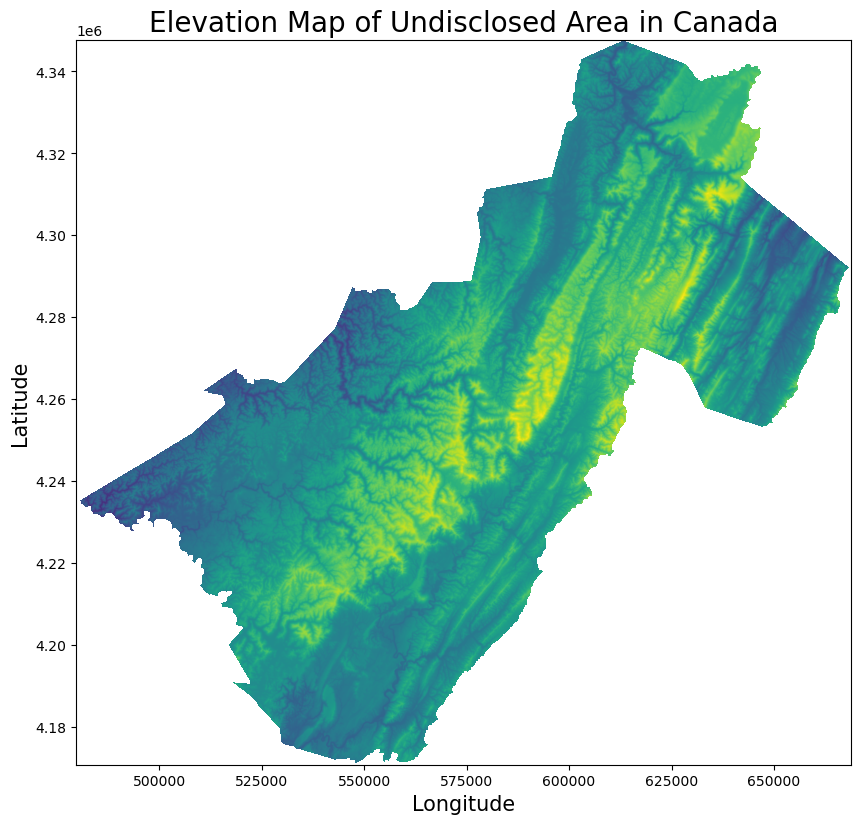

In [64]:
elev = rio.open('elev.tif') #opens dataset as elev
fig2, ax = plt.subplots(figsize=(10,10)) #defines the figure as a subplot on one ax
show(elev, ax=ax) #shows the data (aka prints it)
elev.close() #closes raster file
ax.set_title('Elevation Map of Undisclosed Area in Canada', fontsize=20) #prints title onto dataset
ax.set_xlabel('Longitude', fontsize=15) #prints x label onto dataset
ax.set_ylabel('Latitude', fontsize=15) #prints y label onto dataset

---
**Task 5** Create Histograms from the raster.

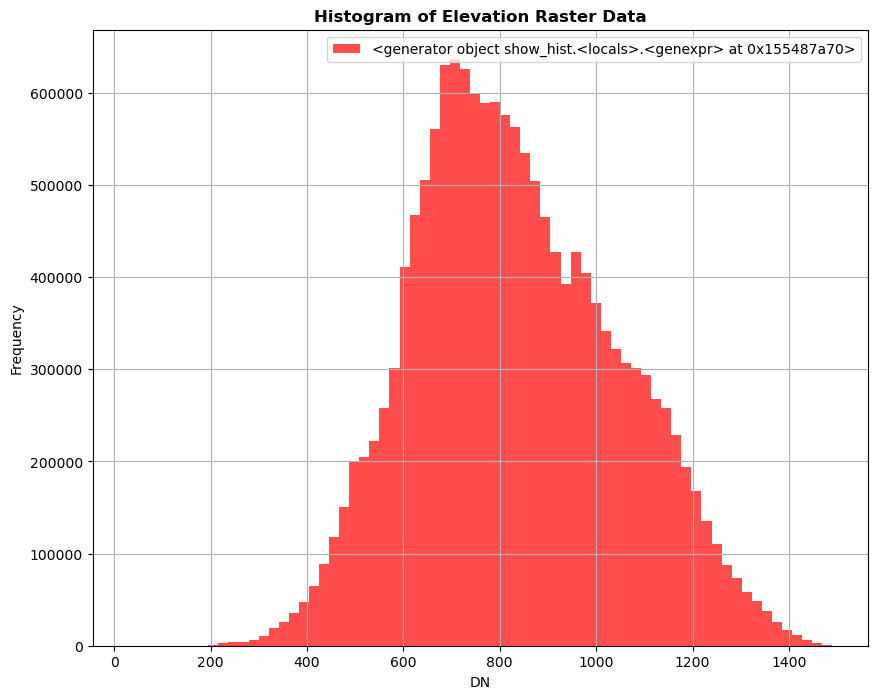

In [65]:
elev = rio.open('elev.tif') #opens dataset

show_hist(elev, bins=70, lw=0.0, stacked=False, alpha=0.7, histtype='stepfilled',
          title='Histogram of Elevation Raster Data')
# prints histogram while defining the different proximities, data amounts etc.

elev.close()#closes datset